# Testing
I made this notebook just to mess around with the data and test out some of the preprocessing steps. 

**To do**
* Load the data
* Some visualizations
* Preprocessing
    * Try out most popular libraries : sklearn and NLTK
    * Feature extraction
        * First step is probably classifying by word or ngram frequency using vector representation ("bag of words")
        * Graph representation much more complex but would be fun to try if we have time
        * Tokenization (getting a bunch of features from the text for each sample)
        * Vectorization (create numeric feature matrix)
        * Normalization
            * term frequency (tf-idf)
            * term frequency-inverse document frequency (tf-idf)
            * Many other possibilities
* Feature selection
    * Removing stop words
    * Statistical feature selection (chi squared, mutual info, etc.)
    * PCA
* Model selection
* Training
* Evaluation

In [127]:
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in the data.

In [115]:
data = pd.read_csv('mbti_1.csv')
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


This is a 16 class classification problem, with each sample consists of a collection of strings.

In [116]:
classes = pd.unique(data['type'])
print('Classes:')
print(classes)
print()
print('Example posts:')
pprint(data.loc[0, 'posts'].split('|||')[:4])

Classes:
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']

Example posts:
["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  '
 'sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  '
 'pranks',
 'What has been the most life-changing experience in your life?']


The class labels should be changed to integers.

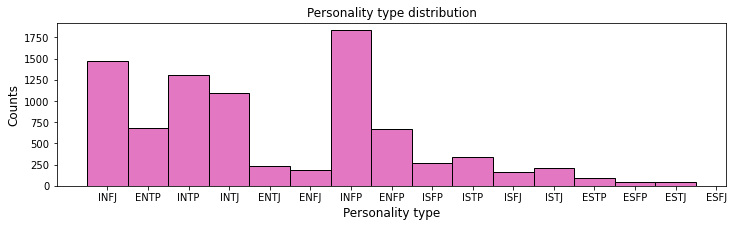

In [122]:
ax = data['type'].hist(figsize=(12, 3), bins=np.arange(16)-0.5, ec='k', color='tab:pink', grid=False)
ax.set_xlabel('Personality type', fontsize='large')
ax.set_ylabel('Counts', fontsize='large')
ax.set_title('Personality type distribution', fontsize='large');

In [70]:
mapping = {c: i for i, c in enumerate(classes)}
data = data.replace(mapping)
data

,type,posts
0,0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,1,'I'm finding the lack of me in these posts ver...
2,2,'Good one _____ https://www.youtube.com/wat...
3,3,"'Dear INTP, I enjoyed our conversation the o..."
4,4,'You're fired.|||That's another silly misconce...
...,...,...
8670,8,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,7,'So...if this thread already exists someplace ...
8672,2,'So many questions when i do these things. I ...
8673,6,'I am very conflicted right now when it comes ...
